#Read

In [2]:
# from google.colab import drive
import pandas as pd
# drive.mount('/content/drive')

file_path_2022 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification-new.csv"
file_path_2024 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification.csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

df = pd.concat([df_2024, df_2022], ignore_index=True)
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])


In [3]:
df

,Name,Price,Side,Volume,Order_Executed,Target,day,month,year,hour,minute,second,day_of_week,time
0,84765908,6400000.0,1,1,0,0,3,3,2024,7,45,14,1,2024-03-03 07:45:14
1,84765353,26600000.0,0,1,0,0,3,3,2024,7,45,14,1,2024-03-03 07:45:14
2,84765395,10000.0,0,1,0,0,3,3,2024,7,45,14,1,2024-03-03 07:45:14
3,84842517,16600000.0,0,1,0,0,3,3,2024,7,45,14,1,2024-03-03 07:45:14
4,84805688,10000.0,0,1,0,0,3,3,2024,7,45,14,1,2024-03-03 07:45:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27189557,1184928,930900.0,0,3605,1,0,4,5,2023,14,31,7,5,2023-05-04 14:31:07
27189558,1184928,930800.0,1,11078,1,0,4,5,2023,14,31,7,5,2023-05-04 14:31:07
27189559,1184928,930800.0,0,11078,1,0,4,5,2023,14,31,7,5,2023-05-04 14:31:07
27189560,1184928,930800.0,1,71797,1,0,4,5,2023,14,31,7,5,2023-05-04 14:31:07


In [4]:
print(df.isna().sum())

Name              0
Price             0
Side              0
Volume            0
Order_Executed    0
Target            0
day               0
month             0
year              0
hour              0
minute            0
second            0
day_of_week       0
dtype: int64


In [ ]:
percentages = y.value_counts(normalize=True) * 100
for label, pct in percentages.items():
    print(f"Class {label}: {pct:.2f}%")

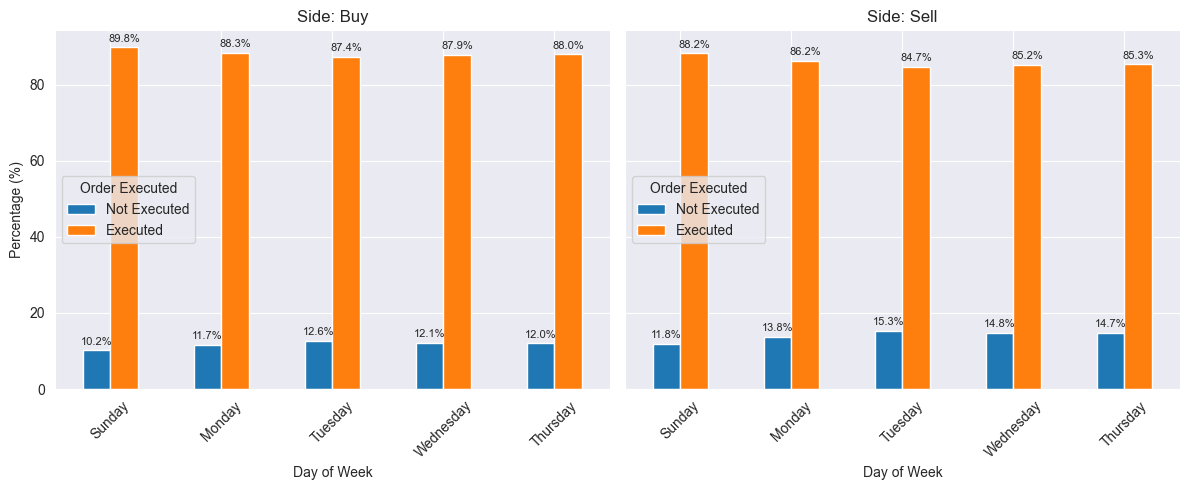

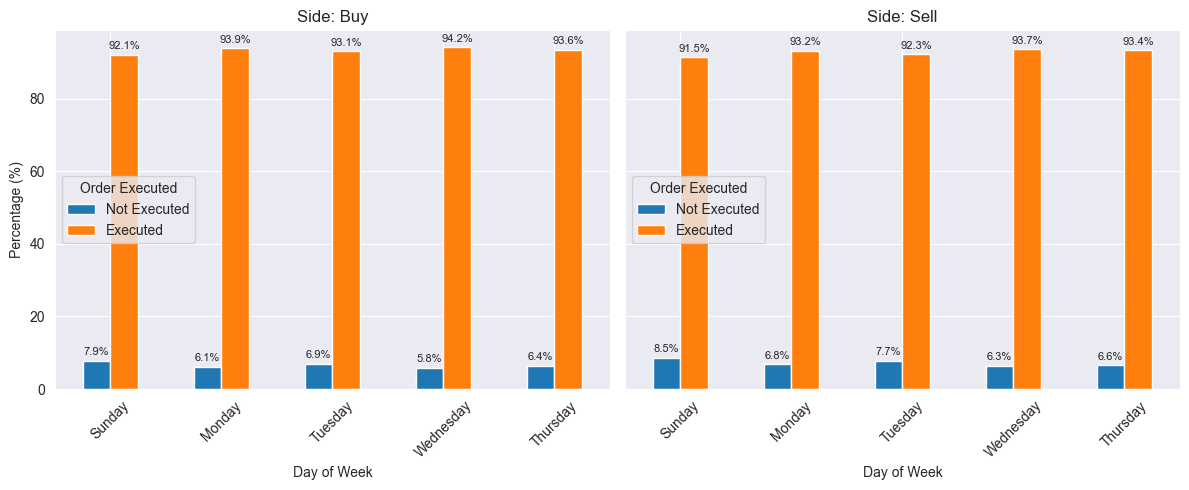

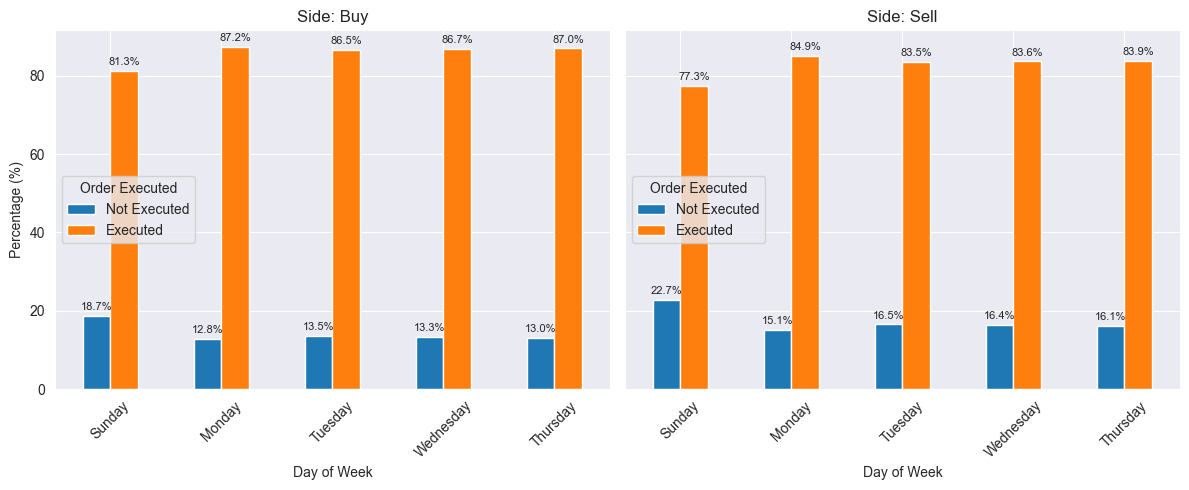

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_best_day(df):

    # Group and calculate percentage
    grouped = df.groupby(['Side', 'day_of_week', 'Order_Executed']).size().reset_index(name='count')
    total_per_group = grouped.groupby(['Side', 'day_of_week'])['count'].transform('sum')
    grouped['percentage'] = 100 * grouped['count'] / total_per_group

    # Mapping
    side_map = {0: 'Buy', 1: 'Sell'}
    day_map = {
        1: 'Sunday', 2: 'Monday', 3: 'Tuesday',
        4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'
    }
    filtered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

    # Apply mappings
    grouped['Side'] = grouped['Side'].map(side_map)
    grouped['day_of_week'] = grouped['day_of_week'].map(day_map)

    # Filter days
    grouped = grouped[grouped['day_of_week'].isin(filtered_days)]

    # Filter out sides with no data
    sides = grouped['Side'].unique()
    sides = [s for s in sides if not grouped[grouped['Side'] == s].empty]

    # Plot
    fig, axes = plt.subplots(1, len(sides), figsize=(12, 5), sharey=True)

    for i, side in enumerate(sides):
        side_data = grouped[grouped['Side'] == side]
        pivot = side_data.pivot(index='day_of_week', columns='Order_Executed', values='percentage').fillna(0)
        pivot = pivot.reindex(filtered_days)
        pivot.rename(columns={0: 'Not Executed', 1: 'Executed'}, inplace=True)

        ax = axes[i]
        bars = pivot.plot(kind='bar', stacked=False, ax=ax, title=f'Side: {side}')

        for bar_container in bars.containers:
            for bar in bar_container:
                height = bar.get_height()
                if height > 0:
                    bars.text(
                        bar.get_x() + bar.get_width() / 2,
                        height + 1,
                        f'{height:.1f}%',
                        ha='center',
                        va='bottom',
                        fontsize=8
                    )

        ax.set_ylabel('Percentage (%)' if i == 0 else "")
        ax.set_xlabel('Day of Week')
        ax.legend(title='Order Executed')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()



plot_best_day(df)
plot_best_day(df_2024)
plot_best_day(df_2022)

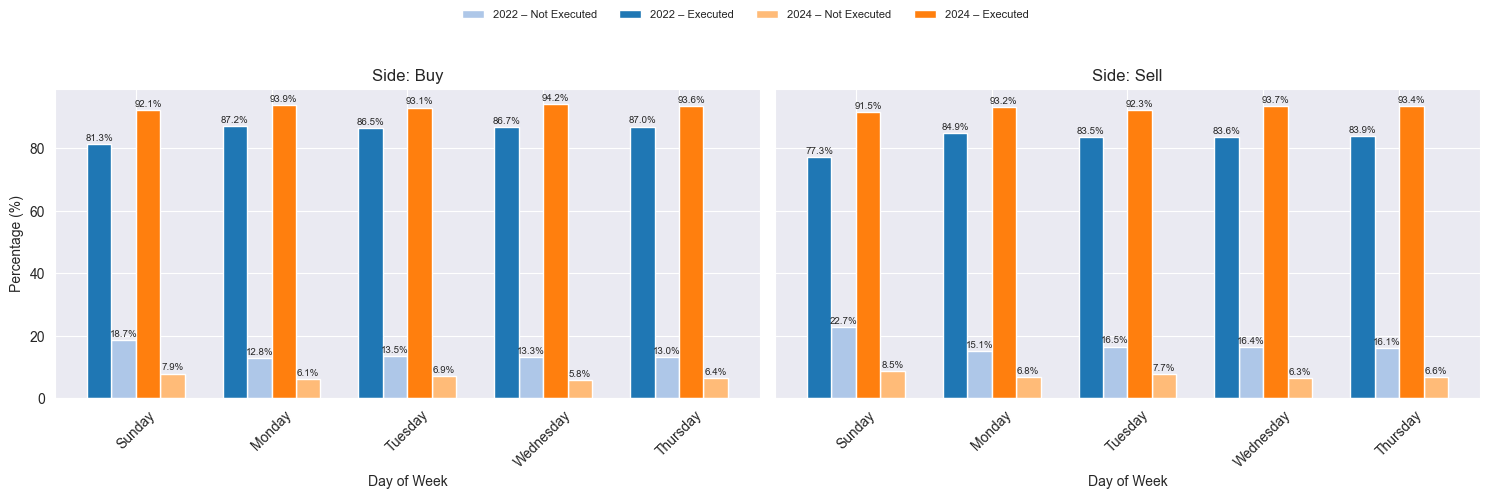

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_best_day_compare(df_all, df_2024,
                          label_all='2022', label_2024='2024'):
    """
    Grouped bar-chart comparison with value labels:
    - Four bars per weekday: (All-Executed, All-Not, 2024-Executed, 2024-Not)
    - Separate panels for Buy / Sell sides
    """

    # ---------- helpers ----------
    side_map = {0: 'Buy', 1: 'Sell'}
    day_map  = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday',
                4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
    days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

    def prep(df, tag):
        g = (df.groupby(['Side', 'day_of_week', 'Order_Executed'])
               .size()
               .reset_index(name='cnt'))
        g['pct'] = 100 * g['cnt'] / g.groupby(['Side', 'day_of_week'])['cnt'].transform('sum')
        g['Dataset'] = tag
        g['Side'] = g['Side'].map(side_map)
        g['day_of_week'] = g['day_of_week'].map(day_map)
        return g[g['day_of_week'].isin(days)]

    df_a = prep(df_all , label_all)
    df_b = prep(df_2024, label_2024)
    data = pd.concat([df_a, df_b], ignore_index=True)

    # ---------- colour palette ----------
    palette = {(label_all , 1): '#1f77b4',  # deep blue
               (label_all , 0): '#aec7e8',  # light blue
               (label_2024, 1): '#ff7f0e',  # deep orange
               (label_2024, 0): '#ffbb78'}  # light orange

    sides  = sorted(data['Side'].dropna().unique())
    n_days = len(days)
    bar_w  = 0.18
    idx    = np.arange(n_days)

    offsets = { (label_all ,1): -1.5*bar_w,
                (label_all ,0): -0.5*bar_w,
                (label_2024,1):  0.5*bar_w,
                (label_2024,0):  1.5*bar_w }

    fig, axes = plt.subplots(1, len(sides), figsize=(15, 5), sharey=True)
    if len(sides) == 1:
        axes = [axes]

    legend_done = set()

    for ax, side in zip(axes, sides):
        sub = data[data['Side'] == side]

        for (ds, executed_flag), grp in sub.groupby(['Dataset', 'Order_Executed']):
            pivot = (grp.pivot(index='day_of_week',
                               columns='Order_Executed',
                               values='pct')
                        .reindex(days)
                        .fillna(0))

            pct_vals = pivot[executed_flag].values
            x_vals   = idx + offsets[(ds, executed_flag)]

            label = f'{ds} – {"Executed" if executed_flag else "Not Executed"}'
            bars = ax.bar(x_vals,
                          pct_vals,
                          width=bar_w,
                          color=palette[(ds, executed_flag)],
                          label=label if label not in legend_done else None)

            # ---- add value labels ----
            for bar, pct in zip(bars, pct_vals):
                ax.text(bar.get_x() + bar.get_width() / 2,
                        bar.get_height() + 0.5,
                        f'{pct:.1f}%',
                        ha='center', va='bottom', fontsize=7)

            legend_done.add(label)

        ax.set_title(f'Side: {side}')
        ax.set_xticks(idx)
        ax.set_xticklabels(days, rotation=45)
        ax.set_xlabel('Day of Week')
        if side == sides[0]:
            ax.set_ylabel('Percentage (%)')

    fig.legend(loc='upper center', ncol=4, frameon=False, fontsize=8)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

# -------- run --------
plot_best_day_compare(df_2022, df_2024)


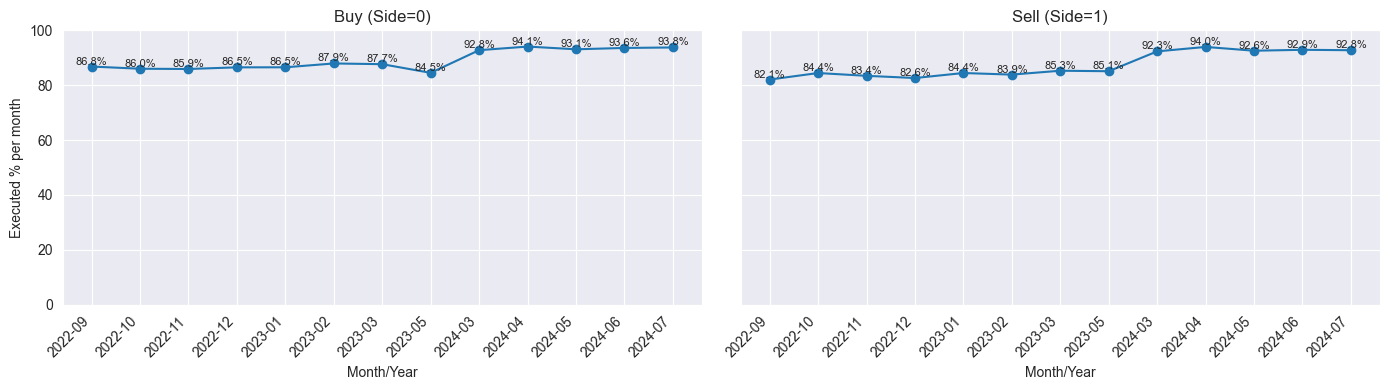

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ── 1.  Prep ──────────────────────────────────────────────
df1 = df.copy()
df1['month'] = pd.to_datetime(df1['time']).dt.to_period('M')
df1['Order_Executed'] = pd.to_numeric(df1['Order_Executed'], errors='coerce')

monthly = (
    df1.dropna(subset=['Order_Executed', 'Side', 'month'])
       .groupby(['Side', 'month'])['Order_Executed']
       .agg(executed='sum', total='count')
       .assign(pct=lambda x: x.executed / x.total * 100)
       .reset_index()
)

monthly['month'] = monthly['month'].dt.to_timestamp()   # back to datetime

# ── 2.  Plot (monthly, label each point) ────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

for ax, side in zip(axes, [0, 1]):
    s = monthly[monthly['Side'] == side].sort_values('month')
    x = range(len(s))                       # compact x‑axis → no gaps
    ax.plot(x, s['pct'], marker='o')
    ax.set_xticks(x)
    ax.set_xticklabels(s['month'].dt.strftime('%Y‑%m'),
                       rotation=45, ha='right')
    ax.set_title(f"{'Buy' if side == 0 else 'Sell'} (Side={side})")
    ax.set_xlabel("Month/Year")
    ax.grid(True)

    # add percentage label above each point
    for xi, yi in zip(x, s['pct']):
        ax.text(xi, yi, f"{yi:.1f}%", ha='center', va='bottom', fontsize=8)

axes[0].set_ylabel("Executed % per month")
axes[0].set_ylim(0, 100)

plt.tight_layout()
plt.show()


#Analytics and Pre-Process

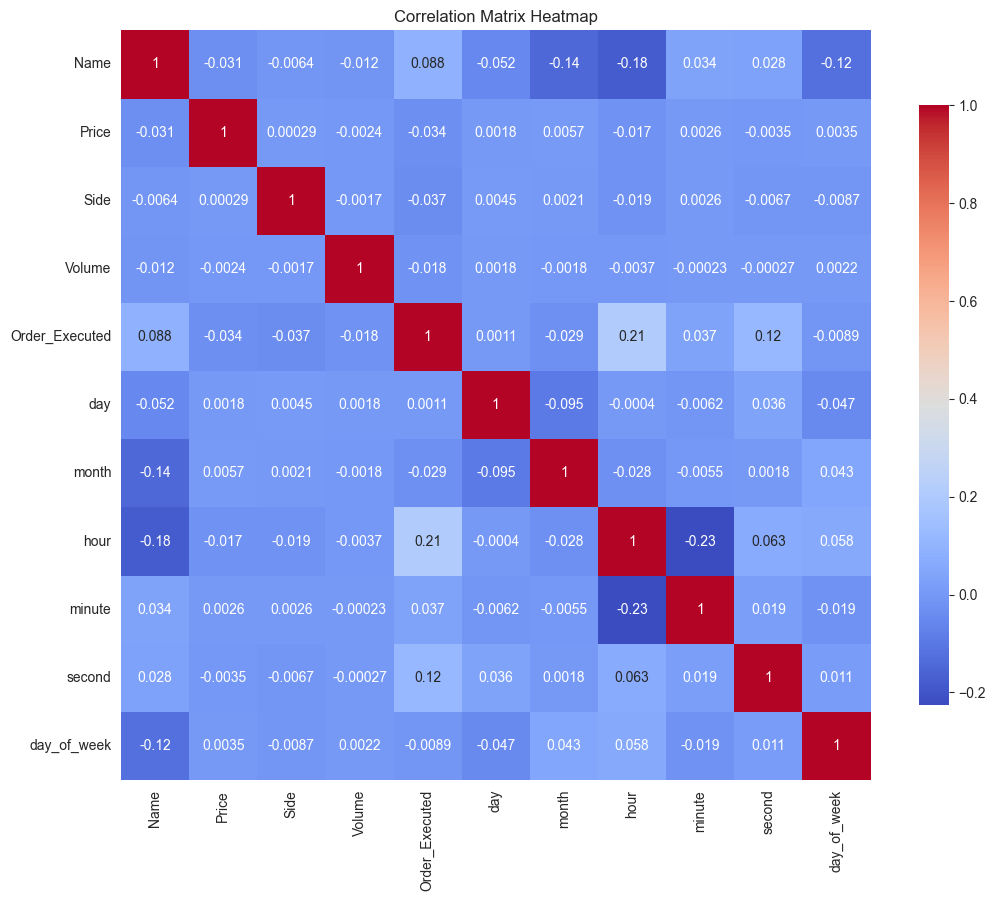

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.drop(columns=['Target','year']).corr()

# Plotting the heatmap for the correlation matrix with a larger figure size
plt.figure(figsize=(11, 9))  # Make the figure larger as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,
            cbar_kws={"shrink": 0.8}, xticklabels=1, yticklabels=1)  # Control label density and stretch
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()  # Adjust layout to fill space
plt.show()

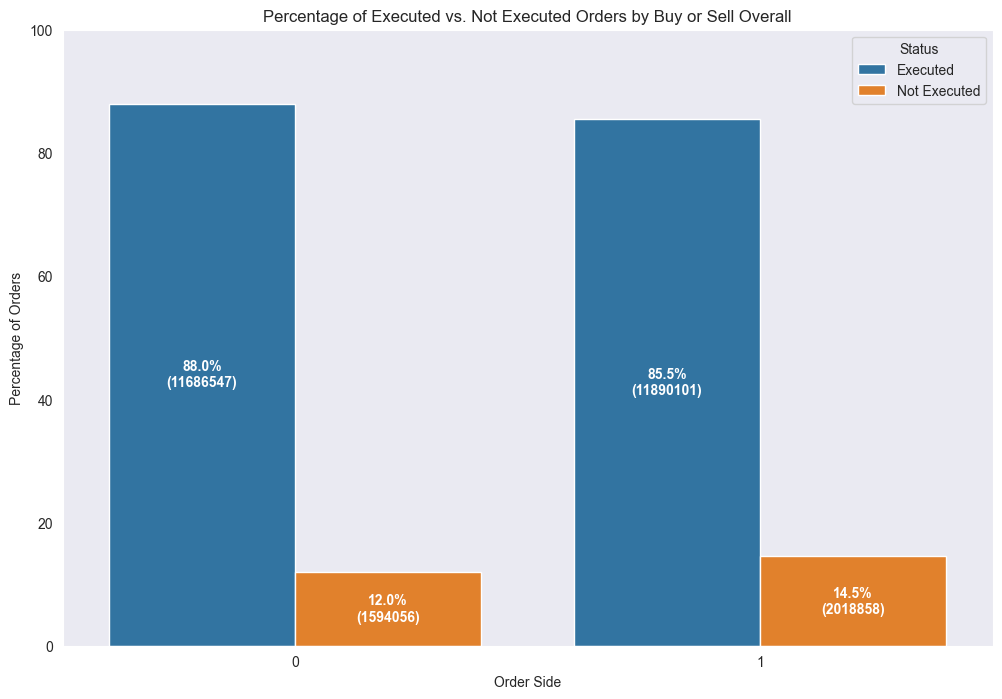

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a 'Status' column to represent executed and non-executed orders
df['Status'] = df['Order_Executed'].apply(lambda x: 'Executed' if x == 1 else 'Not Executed')

# Group by 'Side' and 'Status' and calculate counts
side_status_counts = df.groupby(['Side', 'Status']).size().unstack().fillna(0)

# Calculate percentage within each side (Buy or Sell)
side_status_percent = side_status_counts.div(side_status_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
side_status_percent = side_status_percent.reset_index().melt(id_vars='Side', var_name='Status', value_name='Percentage')
side_status_counts = side_status_counts.reset_index().melt(id_vars='Side', var_name='Status', value_name='Count')

# Merge counts and percentages for annotation and reset the index
side_status_data = pd.merge(side_status_percent, side_status_counts, on=['Side', 'Status']).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Side', y='Percentage', hue='Status', data=side_status_data, palette=['#1f77b4', '#ff7f0e'])

# Annotate each bar with percentage and count
for i, bar in enumerate(bar_plot.patches):
    try:
      # Get the height (percentage) of each bar and corresponding count
      height = bar.get_height()
      count = side_status_data.loc[i, 'Count']  # Access count using .loc

      # Display percentage and count inside each bar
      bar_plot.text(
          bar.get_x() + bar.get_width() / 2,
          height / 2,  # Position text in the middle of the bar
          f'{height:.1f}%\n({int(count)})',
          ha='center',
          va='center',
          color='white',
          fontsize=10,
          fontweight='bold'
      )
    except:
      continue

plt.title('Percentage of Executed vs. Not Executed Orders by Buy or Sell Overall')
plt.xlabel('Order Side')
plt.ylabel('Percentage of Orders')
plt.ylim(0, 100)  # Set y-axis to 100% max
plt.legend(title='Status')
plt.grid(axis='y')

plt.show()


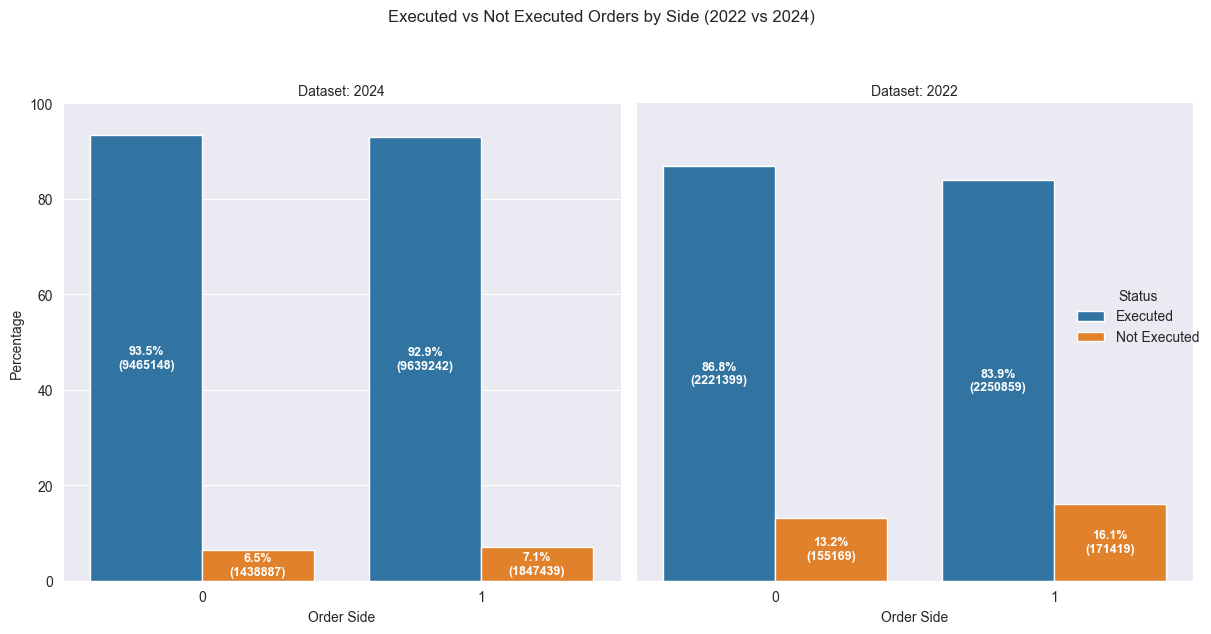

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def prepare_plot_data(df, label):
    df['Status'] = df['Order_Executed'].apply(lambda x: 'Executed' if x == 1 else 'Not Executed')
    counts = df.groupby(['Side', 'Status']).size().unstack().fillna(0)
    percent = counts.div(counts.sum(axis=1), axis=0) * 100

    percent = percent.reset_index().melt(id_vars='Side', var_name='Status', value_name='Percentage')
    counts = counts.reset_index().melt(id_vars='Side', var_name='Status', value_name='Count')

    merged = pd.merge(percent, counts, on=['Side', 'Status']).reset_index(drop=True)
    merged['Dataset'] = label
    return merged

# Prepare and combine
plot_data_2024 = prepare_plot_data(df_2024.copy(), '2024')
plot_data_2022 = prepare_plot_data(df_2022.copy(), '2022')
combined_data = pd.concat([plot_data_2024, plot_data_2022])

# Use catplot for faceted barplot
g = sns.catplot(
    data=combined_data,
    kind='bar',
    x='Side', y='Percentage',
    hue='Status',
    col='Dataset',
    palette=['#1f77b4', '#ff7f0e'],
    height=6, aspect=0.9
)

# Annotate each subplot
for ax, (_, subdata) in zip(g.axes.flat, combined_data.groupby('Dataset')):
    for bars, (_, row) in zip(ax.patches, subdata.iterrows()):
        height = bars.get_height()
        ax.text(
            bars.get_x() + bars.get_width() / 2,
            height / 2,
            f"{height:.1f}%\n({int(row['Count'])})",
            ha='center', va='center',
            color='white', fontsize=9, fontweight='bold'
        )

g.set_titles("Dataset: {col_name}")
g.set_axis_labels("Order Side", "Percentage")
g.fig.suptitle("Executed vs Not Executed Orders by Side (2022 vs 2024)", y=1.05)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


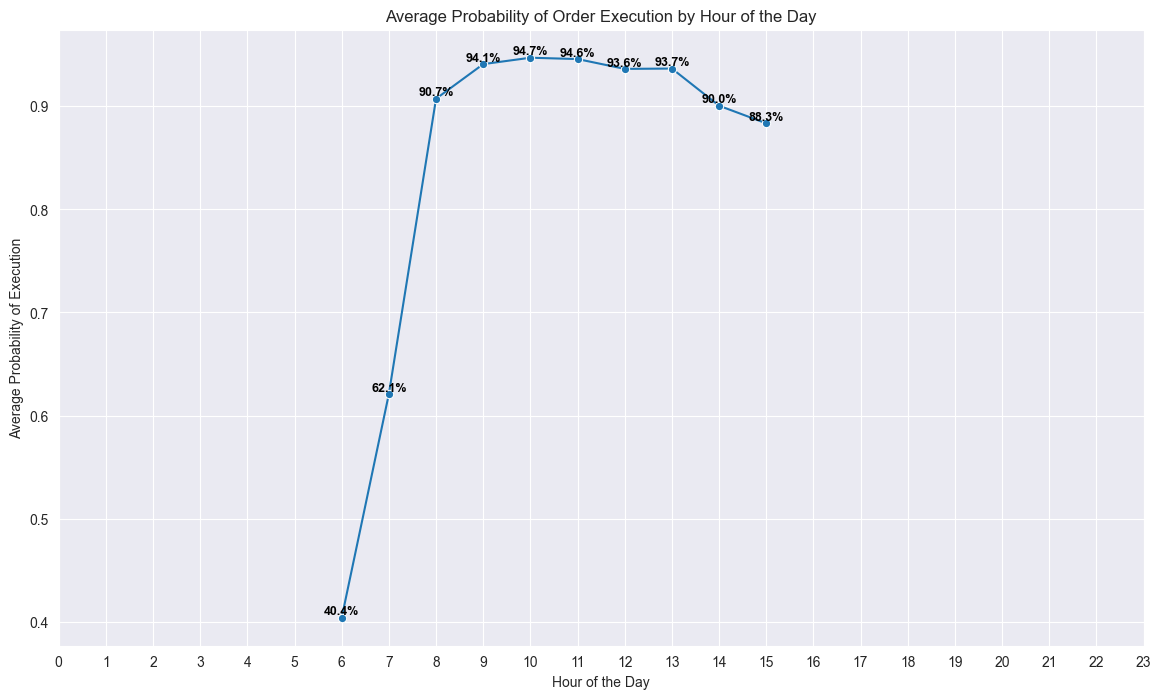

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by hour and calculate mean probability of execution
hourly_data = df.groupby('hour')['Order_Executed'].mean().reset_index()

plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x='hour', y='Order_Executed', data=hourly_data, marker='o')
plt.title('Average Probability of Order Execution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Probability of Execution')
plt.xticks(range(0, 24))
plt.grid(True)

# Annotate each point with the specific percentage
for i in range(len(hourly_data)):
    plt.text(
        x=hourly_data['hour'][i],
        y=hourly_data['Order_Executed'][i],
        s=f"{hourly_data['Order_Executed'][i] * 100:.1f}%",  # Convert to percentage
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.show()


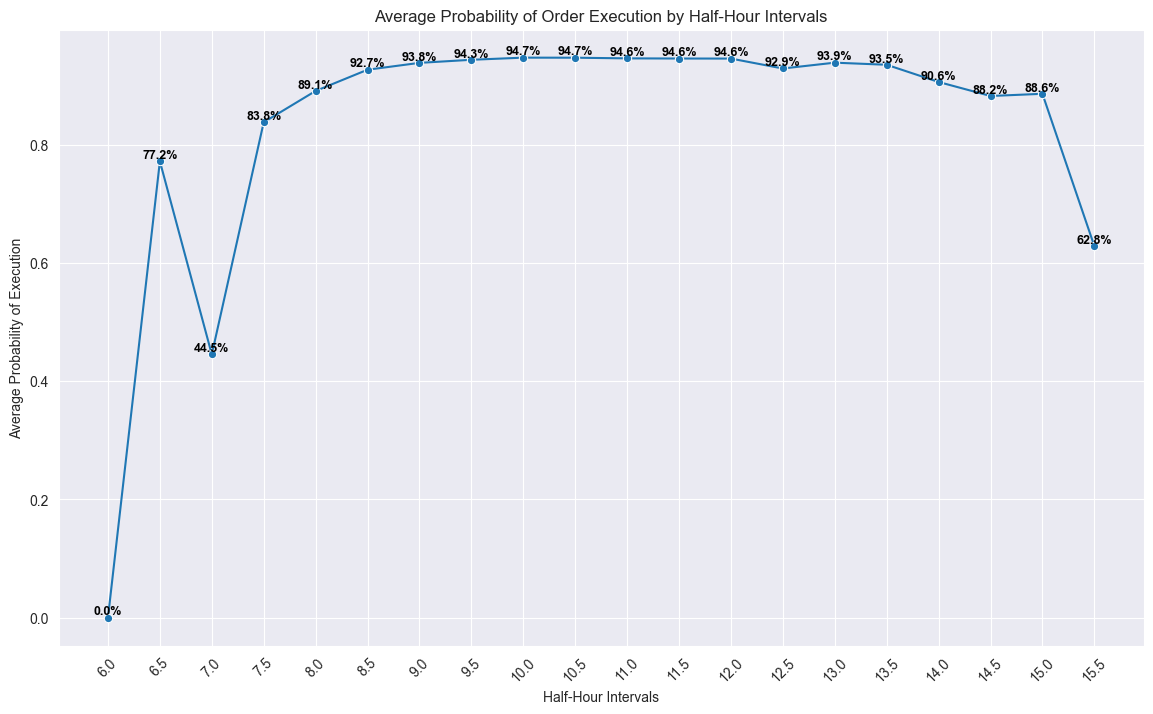

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'Half_Hour' based on 'Hour' and 'Minute'
df['Half_Hour'] = df['hour'] + (df['minute'] >= 30) * 0.5

# Group by 'Half_Hour' and calculate the mean probability of execution
half_hourly_data = df.groupby('Half_Hour')['Order_Executed'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x='Half_Hour', y='Order_Executed', data=half_hourly_data, marker='o')
plt.title('Average Probability of Order Execution by Half-Hour Intervals')
plt.xlabel('Half-Hour Intervals')
plt.ylabel('Average Probability of Execution')
plt.xticks(half_hourly_data['Half_Hour'], rotation=45)
plt.grid(True)

# Annotate each point with the specific percentage
for i in range(len(half_hourly_data)):
    plt.text(
        x=half_hourly_data['Half_Hour'][i],
        y=half_hourly_data['Order_Executed'][i],
        s=f"{half_hourly_data['Order_Executed'][i] * 100:.1f}%",  # Convert to percentage
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.show()


#DL for Classification



In [40]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import os
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np
from tensorflow.keras.optimizers import Adam

import pandas as pd

file_path_2024 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification-new.csv"
file_path_2022 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification.csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

data = pd.concat([df_2024, df_2022], ignore_index=True)

target_column = "Order_Executed"  # Target column name

# Separate features and target
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM/GRU compatibility (samples, timesteps=1, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    classification_report, precision_recall_curve, roc_curve, auc,
    average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

# Define a dictionary for models
models = {
    'LSTM': Sequential([
        LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.2),
        LSTM(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ]),

    'GRU': Sequential([
        GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        GRU(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
}

# Compile and train each model in the loop
history_dict = {}  # To store training history for both models
y_preds = {}  # To store predictions for each model
y_probs = {}  # To store probability predictions for each model

# Loop through models
for name, model in models.items():
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(f"\nTraining {name} model...")

    # Train the model
    history_dict[name] = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'{name} Model - Test Loss: {loss}, Test Accuracy: {accuracy}')

    # Store predictions
    y_preds[name] = model.predict(X_test)
    y_probs[name] = model.predict(X_test).flatten()

    # Classification Report
    print(f"{name} Classification Report:\n", classification_report(y_test, (y_probs[name] > 0.5)))

# Plot Precision-Recall and ROC Curves
fig, axs = plt.subplots(2, len(models), figsize=(16, 8))

for i, (name, _) in enumerate(models.items()):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs[name])
    pr_auc = auc(recall, precision)  # Integral for Precision-Recall Curve
    avg_precision = average_precision_score(y_test, y_probs[name])  # Average Precision Score
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot(ax=axs[0, i])
    axs[0, i].set_title(f'{name} Precision-Recall Curve\nPR AUC: {pr_auc:.4f}, AP: {avg_precision:.4f}')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs[name])
    roc_auc = auc(fpr, tpr)  # Integral for ROC Curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_display.plot(ax=axs[1, i])
    axs[1, i].set_title(f'{name} ROC Curve\nAUC: {roc_auc:.4f}')

plt.tight_layout()
plt.show()



KeyboardInterrupt: 

#ML for Classification

In [4]:
!pip install catboost
!pip install optuna


  Using cached catboost-1.2.8-cp310-cp310-win_amd64.whl (102.5 MB)
  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached plotly-6.1.1-py3-none-any.whl (16.1 MB)
  Using cached narwhals-1.40.0-py3-none-any.whl (357 kB)



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached optuna-4.3.0-py3-none-any.whl (386 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached sqlalchemy-2.0.41-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached alembic-1.16.1-py3-none-any.whl (242 kB)
  Using cached mako-1.3.10-py3-none-any.whl (78 kB)
  Using cached greenlet-3.2.2-cp310-cp310-win_amd64.whl (294 kB)



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Training and evaluating XGBoost...


C:\Users\shalevle\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [09:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9672
Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 18861318, number of negative: 2890331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.134614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 21751649, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.867121 -> initscore=1.875742
[LightGBM] [Info] Start training from score 1.875742
LightGBM Accuracy: 0.9583
Training and evaluating CatBoost...
CatBoost Accuracy: 0.9626


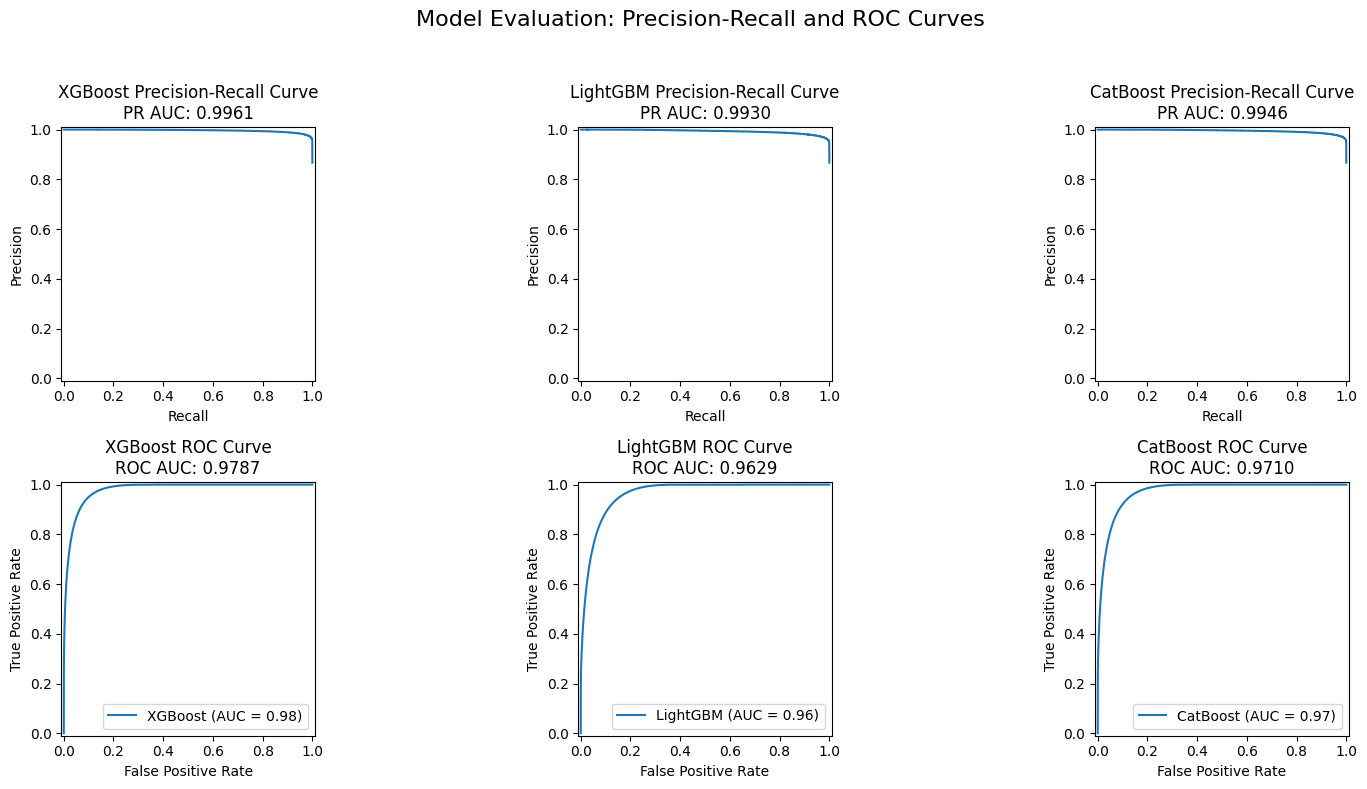

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, roc_curve, auc,
    precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load your dataset
# from google.colab import drive
# drive.mount('/content/drive')

file_path_2024 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification-new.csv"
file_path_2022 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification.csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

data = pd.concat([df_2024, df_2022], ignore_index=True)

target_column = 'Order_Executed'  # Replace with the actual target column

# Prepare the features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models to compare
models = {
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=1000,
        max_depth=10
    ),
    "LightGBM": LGBMClassifier(
        random_state=42,
        n_estimators=1000,
        max_depth=10
    ),
    "CatBoost": CatBoostClassifier(
        verbose=0,
        random_state=42,
        iterations=1000,
        depth=10
    )
}

# Plot Precision-Recall Curve and calculate PR AUC
plt.figure(figsize=(16, 8))
plt.suptitle('Model Evaluation: Precision-Recall and ROC Curves', fontsize=16)

for i, (name, model) in enumerate(models.items()):
    print(f"Training and evaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print accuracy score

    # Plot Precision-Recall Curve
    plt.subplot(2, len(models), i + 1)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)  # Calculate PR AUC
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot(ax=plt.gca())
    plt.title(f'{name} Precision-Recall Curve\nPR AUC: {pr_auc:.4f}')  # Display PR AUC on the plot

    # Plot ROC Curve
    plt.subplot(2, len(models), i + 1 + len(models))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)  # Calculate ROC AUC
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_display.plot(ax=plt.gca())
    plt.title(f'{name} ROC Curve\nROC AUC: {roc_auc:.4f}')  # Display ROC AUC on the plot

# Show plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Taking XGBOOST because its fastest and not too far from catboost. We will run optuna on it to get the best score. also k-folder cv

[I 2025-05-22 10:11:08,816] A new study created in memory with name: no-name-088c136f-4d14-43d6-81fe-065047749b81
[I 2025-05-22 10:22:22,056] Trial 0 finished with value: 0.9611547665437089 and parameters: {'max_depth': 10, 'learning_rate': 0.030779330636370304, 'n_estimators': 1017}. Best is trial 0 with value: 0.9611547665437089.


Trial 0 - Accuracy: 0.9612, Params: {'max_depth': 10, 'learning_rate': 0.030779330636370304, 'n_estimators': 1017, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 10:32:02,579] Trial 1 finished with value: 0.9638684914598671 and parameters: {'max_depth': 10, 'learning_rate': 0.07763829179247424, 'n_estimators': 932}. Best is trial 1 with value: 0.9638684914598671.


Trial 1 - Accuracy: 0.9639, Params: {'max_depth': 10, 'learning_rate': 0.07763829179247424, 'n_estimators': 932, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 10:42:25,751] Trial 2 finished with value: 0.9635667212770782 and parameters: {'max_depth': 10, 'learning_rate': 0.06534253155049864, 'n_estimators': 997}. Best is trial 1 with value: 0.9638684914598671.


Trial 2 - Accuracy: 0.9636, Params: {'max_depth': 10, 'learning_rate': 0.06534253155049864, 'n_estimators': 997, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 10:50:36,757] Trial 3 finished with value: 0.9579941790168397 and parameters: {'max_depth': 8, 'learning_rate': 0.033295347889835764, 'n_estimators': 903}. Best is trial 1 with value: 0.9638684914598671.


Trial 3 - Accuracy: 0.9580, Params: {'max_depth': 8, 'learning_rate': 0.033295347889835764, 'n_estimators': 903, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 11:00:29,034] Trial 4 finished with value: 0.9617275965981802 and parameters: {'max_depth': 10, 'learning_rate': 0.040600408750876796, 'n_estimators': 924}. Best is trial 1 with value: 0.9638684914598671.


Trial 4 - Accuracy: 0.9617, Params: {'max_depth': 10, 'learning_rate': 0.040600408750876796, 'n_estimators': 924, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 11:09:17,771] Trial 5 finished with value: 0.954935284915371 and parameters: {'max_depth': 8, 'learning_rate': 0.011900192837361297, 'n_estimators': 946}. Best is trial 1 with value: 0.9638684914598671.


Trial 5 - Accuracy: 0.9549, Params: {'max_depth': 8, 'learning_rate': 0.011900192837361297, 'n_estimators': 946, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 11:18:52,800] Trial 6 finished with value: 0.9629063576412495 and parameters: {'max_depth': 10, 'learning_rate': 0.05767581819309739, 'n_estimators': 909}. Best is trial 1 with value: 0.9638684914598671.


Trial 6 - Accuracy: 0.9629, Params: {'max_depth': 10, 'learning_rate': 0.05767581819309739, 'n_estimators': 909, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 11:29:10,315] Trial 7 finished with value: 0.9633149702836364 and parameters: {'max_depth': 10, 'learning_rate': 0.06447888646294707, 'n_estimators': 952}. Best is trial 1 with value: 0.9638684914598671.


Trial 7 - Accuracy: 0.9633, Params: {'max_depth': 10, 'learning_rate': 0.06447888646294707, 'n_estimators': 952, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 11:37:10,509] Trial 8 finished with value: 0.9612426679132233 and parameters: {'max_depth': 8, 'learning_rate': 0.08535287752632986, 'n_estimators': 956}. Best is trial 1 with value: 0.9638684914598671.


Trial 8 - Accuracy: 0.9612, Params: {'max_depth': 8, 'learning_rate': 0.08535287752632986, 'n_estimators': 956, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


[I 2025-05-22 11:45:14,511] Trial 9 finished with value: 0.9609418172008268 and parameters: {'max_depth': 8, 'learning_rate': 0.08032443173865632, 'n_estimators': 944}. Best is trial 1 with value: 0.9638684914598671.


Trial 9 - Accuracy: 0.9609, Params: {'max_depth': 8, 'learning_rate': 0.08032443173865632, 'n_estimators': 944, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}
{'max_depth': 10, 'learning_rate': 0.07763829179247424, 'n_estimators': 932, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}


C:\Users\shalevle\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


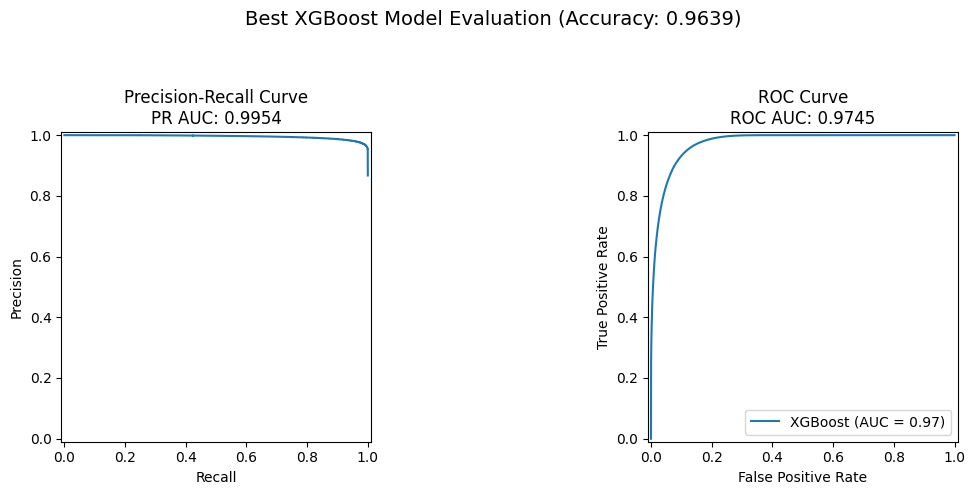

C:\Users\shalevle\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:56:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shalevle\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:04:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shalevle\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:13:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shalevle\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:06] WARNING: C:\actions-runne

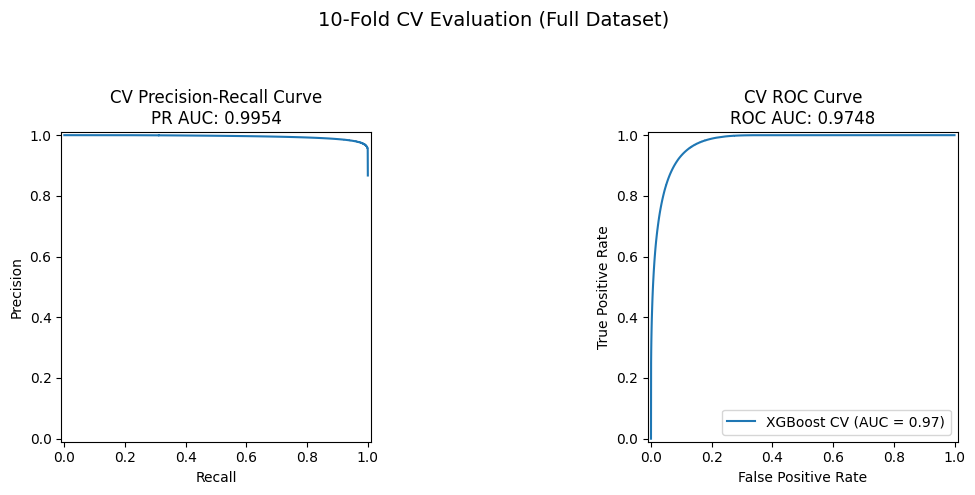

10-Fold CV PR AUC: 0.9954
10-Fold CV ROC AUC: 0.9748


In [8]:
# Re-import required libraries after code execution state reset
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import optuna

# Re-upload files
file_path_2024 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification-new.csv"
file_path_2022 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification.csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

# Combine datasets
data = pd.concat([df_2024, df_2022], ignore_index=True)

# Prepare features and target
target_column = 'Order_Executed'
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optuna objective function
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 8, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 900, 1100),
        'eval_metric': 'logloss',
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Trial {trial.number} - Accuracy: {acc:.4f}, Params: {params}")
    return acc

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Train best model
best_params = study.best_params
best_params.update({'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42})
print(best_params)
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

# Prepare plots
plt.figure(figsize=(12, 5))
plt.suptitle(f'Best XGBoost Model Evaluation (Accuracy: {accuracy:.4f})', fontsize=14)

# Precision-Recall
plt.subplot(1, 2, 1)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot(ax=plt.gca())
plt.title(f'Precision-Recall Curve\nPR AUC: {pr_auc:.4f}')

# ROC
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="XGBoost")
roc_display.plot(ax=plt.gca())
plt.title(f'ROC Curve\nROC AUC: {roc_auc:.4f}')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

from sklearn.metrics import precision_recall_curve, roc_curve, auc

# 10-Fold CV with plots
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

all_y_true = []
all_y_probs = []

for train_idx, test_idx in cv.split(X, y):
    X_tr, X_val = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[test_idx]

    model = XGBClassifier(**best_params)
    model.fit(X_tr, y_tr)

    y_prob = model.predict_proba(X_val)[:, 1]

    all_y_true.extend(y_val)
    all_y_probs.extend(y_prob)

# Convert to Series for plotting
all_y_true = pd.Series(all_y_true)
all_y_probs = pd.Series(all_y_probs)

all_y_pred = (all_y_probs > 0.5).astype(int)

# Calculate accuracy
cv_accuracy = accuracy_score(all_y_true, all_y_pred)

# Plot
plt.figure(figsize=(12, 5))
plt.suptitle('10-Fold CV Evaluation XGBoost(Accuracy:'+cv_accuracy +')', fontsize=14)

# Precision-Recall
plt.subplot(1, 2, 1)
precision, recall, _ = precision_recall_curve(all_y_true, all_y_probs)
pr_auc_cv = auc(recall, precision)
PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax=plt.gca())
plt.title(f'CV Precision-Recall Curve\nPR AUC: {pr_auc_cv:.4f}')

# ROC
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(all_y_true, all_y_probs)
roc_auc_cv = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_cv, estimator_name="XGBoost CV").plot(ax=plt.gca())
plt.title(f'CV ROC Curve\nROC AUC: {roc_auc_cv:.4f}')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# Optional print of average accuracy
print(f"10-Fold CV PR AUC: {pr_auc_cv:.4f}")
print(f"10-Fold CV ROC AUC: {roc_auc_cv:.4f}")


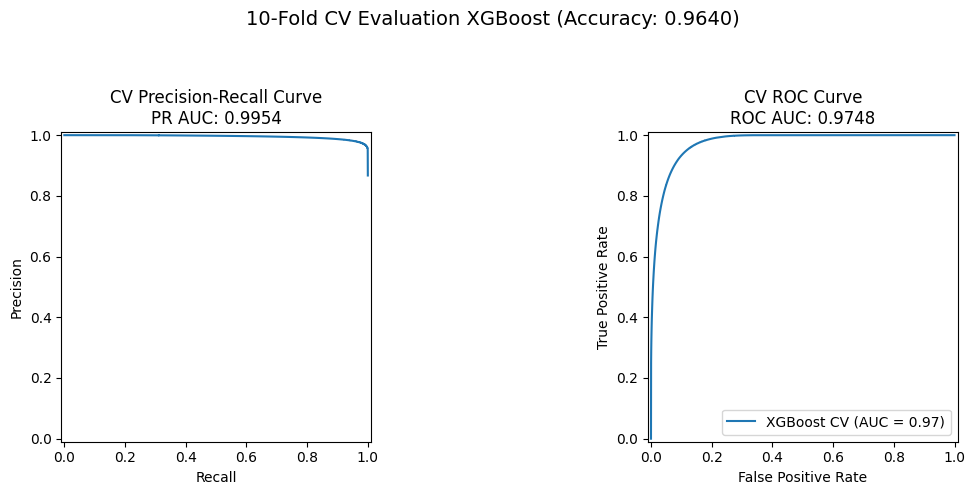

10-Fold CV PR AUC: 0.9954
10-Fold CV ROC AUC: 0.9748


In [11]:
# Plot
plt.figure(figsize=(12, 5))
plt.suptitle('10-Fold CV Evaluation XGBoost (Accuracy: 0.9640)', fontsize=14)

# Precision-Recall
plt.subplot(1, 2, 1)
precision, recall, _ = precision_recall_curve(all_y_true, all_y_probs)
pr_auc_cv = auc(recall, precision)
PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax=plt.gca())
plt.title(f'CV Precision-Recall Curve\nPR AUC: {pr_auc_cv:.4f}')

# ROC
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(all_y_true, all_y_probs)
roc_auc_cv = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_cv, estimator_name="XGBoost CV").plot(ax=plt.gca())
plt.title(f'CV ROC Curve\nROC AUC: {roc_auc_cv:.4f}')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# Optional print of average accuracy
print(f"10-Fold CV PR AUC: {pr_auc_cv:.4f}")
print(f"10-Fold CV ROC AUC: {roc_auc_cv:.4f}")

#DL for Forecasting

In [28]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Prediction.csv'
data = pd.read_csv(file_path)
target_column = "Avg_Order_Executed"  # Replace with your target column for regression

# Separate features and target
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM/GRU compatibility (samples, timesteps=1, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define LSTM and GRU models
models = {
    'LSTM': Sequential([
        LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.1),
        LSTM(4, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1)  # Regression task
    ]),
    'GRU': Sequential([
        GRU(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.1),
        GRU(4, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1)  # Regression task
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Compile the model
    model.compile(optimizer='adam', loss='mse')  # Use MSE for regression

    print(f"\nTraining {name} model...")

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=4, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Predictions': y_pred}

    print(f"{name} Model - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    # Plot Predictions vs True Values for each model
    plt.figure(figsize=(12, 8))  # Create a larger figure to accommodate subplots
    for i, (name, result) in enumerate(results.items()):
        y_pred = result['Predictions']

        # Plot predictions vs true values
        plt.subplot(2, 2, i + 1)
        plt.plot(range(len(y_test)), y_test, label="True Values", alpha=0.7)
        plt.plot(range(len(y_pred)), y_pred, label="Predictions", alpha=0.7)
        plt.title(f'{name}: Predictions vs True Values')
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        plt.legend()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Prediction.csv'

#ML for Forecasting

In [8]:
!pip install --upgrade tsfresh
!pip install scipy==1.9.3


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.0 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/9.8 MB 1.7 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.8 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 3.6 MB/s eta 0:00:02
   --------------------------------- ------ 8.1/9.8 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 4.2/4.2 MB 50.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 41.4 MB/s eta 0:00:00
   -----------------------------------

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [45 lines of output]
  + meson setup C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8 C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8\.mesonpy-fkvg4jzv -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8\.mesonpy-fkvg4jzv\meson-python-native-file.ini
  The Meson build system
  Version: 1.7.2
  Source dir: C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8
  Build dir: C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8\.mesonpy-fkvg4jzv
  Build type: native build
  Project name: SciPy
  Project version: 1.9.3
  Activating VS 17.12.4
  C compiler for the host machine: cl (msvc 

[I 2025-04-30 00:55:22,807] A new study created in memory with name: no-name-4d6abb78-15d3-45f4-b04e-dcbbdab714b8
[I 2025-04-30 00:56:28,396] Trial 0 finished with value: 0.0007680945283222395 and parameters: {'n_estimators': 721, 'learning_rate': 0.008459792558997366, 'max_depth': 8}. Best is trial 0 with value: 0.0007680945283222395.
[I 2025-04-30 00:56:53,864] Trial 1 finished with value: 0.0005839956262233606 and parameters: {'n_estimators': 1086, 'learning_rate': 0.010849882409548994, 'max_depth': 5}. Best is trial 1 with value: 0.0005839956262233606.
[I 2025-04-30 01:00:57,079] Trial 2 finished with value: 0.0005202686522582094 and parameters: {'n_estimators': 1472, 'learning_rate': 0.016994684276642445, 'max_depth': 9}. Best is trial 2 with value: 0.0005202686522582094.
[I 2025-04-30 01:02:03,224] Trial 3 finished with value: 0.00043878862518031194 and parameters: {'n_estimators': 1278, 'learning_rate': 0.019312368612912433, 'max_depth': 7}. Best is trial 3 with value: 0.0004387

best LGB params: {'n_estimators': 1278, 'learning_rate': 0.019312368612912433, 'max_depth': 7}


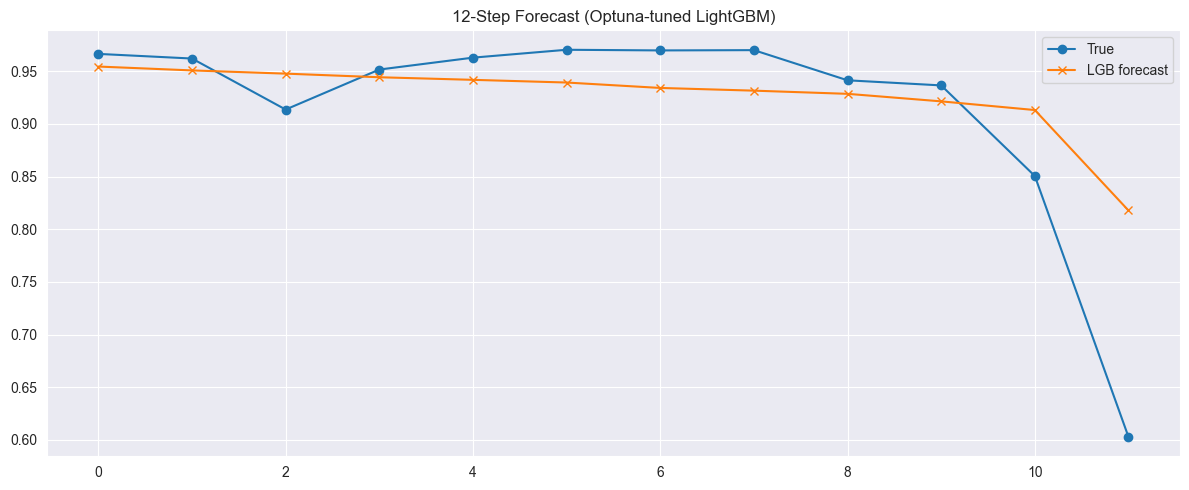

MSE 0.004684221385081786  MAE 0.04139074310716753  R² 0.5331416738908319


In [254]:
# full one-cell script – same pipeline, plus Optuna tuning for LightGBM
# --------------------------------------------------------------------
import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings, optuna
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings("ignore")

# ── 1. load & merge ─────────────────────────────────────────────────────────
fp24 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification-new.csv"
fp22 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Classification.csv"

data = pd.concat([pd.read_csv(fp24), pd.read_csv(fp22)], ignore_index=True)

data["timestamp"] = pd.to_datetime({
    "year": data["Year"], "month": data["Month"], "day": data["Day"],
    "hour": data["Hour"], "minute": data["Minute"], "second": data["Second"]
})
data = (data.sort_values("timestamp")
             .set_index("timestamp")
             .resample("15min").mean()
             .interpolate("linear")
             .drop(columns=["Year","Month","Day","Hour","Minute","Second"], errors="ignore"))

# ── 2. lag features (lag1-120 + 7-pt MA) ────────────────────────────────────
def add_lags(df, col, n=120):
    lags = pd.concat([df[col].shift(i).rename(f"{col}_lag{i}") for i in range(1,n+1)], axis=1)
    ma   = df[col].rolling(7).mean().rename(f"{col}_moving_avg_7")
    return pd.concat([df, lags, ma], axis=1)

TARGET, LAGS = "Avg_Order_Executed", 120
data = add_lags(data, TARGET, LAGS).dropna()

# ── 3. horizon split ────────────────────────────────────────────────────────
H = 12
train_df, horiz_df = data.iloc[:-H], data.iloc[-H:]
future_y           = horiz_df[TARGET].values

X_full = train_df.drop(columns=[TARGET])
y_full = train_df[TARGET]

scaler = StandardScaler()
X_full_sc = scaler.fit_transform(X_full)

# ── 4. Optuna tuning with TimeSeriesSplit on LightGBM ───────────────────────
tscv = TimeSeriesSplit(n_splits=4)

def objective(trial):
    params = dict(
        n_estimators     = trial.suggest_int ("n_estimators", 400, 1500),
        learning_rate    = trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        max_depth        = trial.suggest_int ("max_depth",  3, 10),
        random_state     = 42,
        verbose         = False
    )
    mse_folds=[]
    for tr, vl in tscv.split(X_full_sc):
        mdl = CatBoostRegressor(**params).fit(X_full_sc[tr], y_full.iloc[tr])
        mse_folds.append(mean_squared_error(y_full.iloc[vl], mdl.predict(X_full_sc[vl])))
    return np.mean(mse_folds)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20, timeout=600)          # ~10 min

best = study.best_params
print("best LGB params:", best)

lgb = CatBoostRegressor(**best, random_state=42, verbose= False).fit(X_full_sc, y_full)

# ── 5. walk-forward forecast (independent) ──────────────────────────────────
future_preds = []
last = train_df.iloc[-1].copy()

for _ in range(H):
    for lag in range(LAGS,1,-1):
        last[f"{TARGET}_lag{lag}"] = last[f"{TARGET}_lag{lag-1}"]
    last[f"{TARGET}_lag1"] = last[TARGET]
    last[f"{TARGET}_moving_avg_7"] = np.mean([last[f"{TARGET}_lag{i}"] for i in range(1,8)])

    X_next = scaler.transform(pd.DataFrame([last.drop(TARGET)]))
    y_next = lgb.predict(X_next)[0]
    future_preds.append(y_next)
    last[TARGET] = y_next

future_preds = np.array(future_preds)

# ── 6. plot & metrics ───────────────────────────────────────────────────────
plt.figure(figsize=(12,5))
plt.plot(future_y,  label="True", marker='o')
plt.plot(future_preds, label="LGB forecast", marker='x')
plt.title(f"{H}-Step Forecast (Optuna-tuned LightGBM)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("MSE",mean_squared_error(future_y,future_preds),
      " MAE",mean_absolute_error(future_y,future_preds),
      " R²", r2_score(future_y,future_preds))


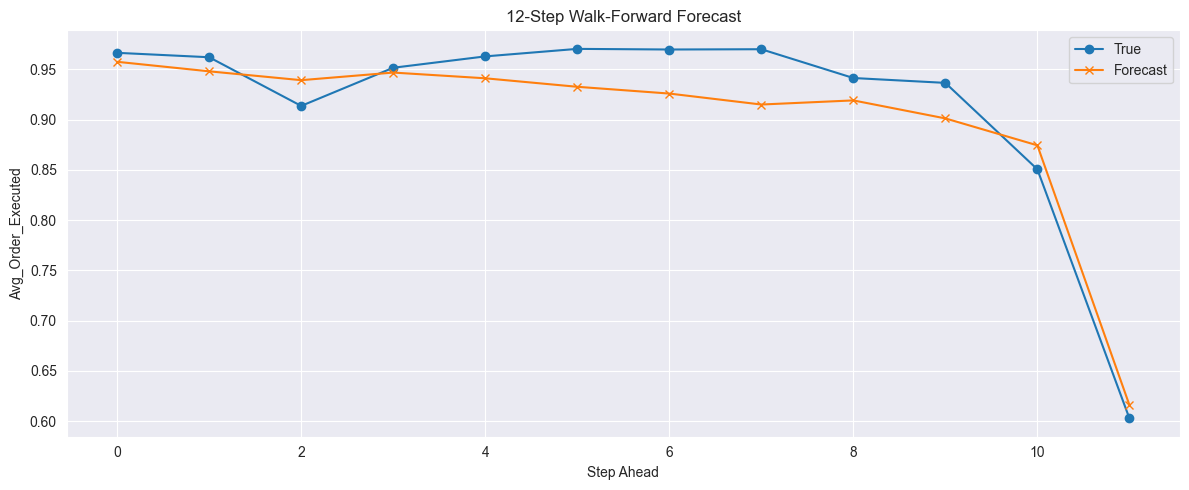

Forecast | MSE: 0.000858  MAE: 0.025545  R²: 0.9145


In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor

# ── 1. Load & merge properly ─────────────────────────────────────────────────
fp24 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction.csv"
fp22 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction-new.csv"
data = pd.concat([pd.read_csv(fp24), pd.read_csv(fp22)], ignore_index=True)

data["timestamp"] = pd.to_datetime({
    "year": data["Year"], "month": data["Month"], "day": data["Day"],
    "hour": data["Hour"], "minute": data["Minute"], "second": data["Second"]
})
data = (data.sort_values("timestamp")
             .set_index("timestamp")
             .resample("15min").mean()
             .interpolate("linear")
             .drop(columns=["Year","Month","Day","Hour","Minute","Second"], errors="ignore"))

# ── 2. Lag features ───────────────────────────────────────────────────────────
def add_lags(df, col, n):
    lagged_features = {
        f"{col}_lag{lag}": df[col].shift(lag) for lag in range(1, n + 1)
    }
    lagged_df = pd.DataFrame(lagged_features, index=df.index)

    moving_avg = df[col].rolling(7).mean().rename(f"{col}_moving_avg_7")

    df_final = pd.concat([df, lagged_df, moving_avg], axis=1)
    return df_final


TARGET, LAGS = "Avg_Order_Executed", 120
data = add_lags(data, TARGET, LAGS).dropna()

# ── 3. Hold-out last H rows for evaluation ───────────────────────────────────
H = 12                                   # forecast horizon
train_df   = data.iloc[:-H].copy()
future_df  = data.iloc[-H:].copy()       # ground-truth we’ll compare against
future_y   = future_df[TARGET].values

# ── 4. Scale & train on *train_df* ────────────────────────────────────────────
X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.apply(pd.to_numeric, errors="coerce").fillna(0))

model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.01, random_state=42, objective="huber")
model.fit(X_train_scaled, y_train)

# ── 5. Recursive walk-forward forecast for next H steps ───────────────────────
future_preds = []
last_row = train_df.iloc[-1].copy()          # most recent row *before* horizon

for _ in range(H):
    # shift lags
    for lag in range(LAGS, 1, -1):
        last_row[f"{TARGET}_lag{lag}"] = last_row[f"{TARGET}_lag{lag-1}"]
    last_row[f"{TARGET}_lag1"] = last_row[TARGET]

    # rolling statistic
    last_row[f"{TARGET}_moving_avg_7"] = np.mean(
        [last_row[f"{TARGET}_lag{i}"] for i in range(1, 8)]
    )

    # build features & predict
    X_next = scaler.transform(pd.DataFrame([last_row.drop(TARGET)]))
    y_next = model.predict(X_next)[0]
    future_preds.append(y_next)

    # feed prediction back for next step
    last_row[TARGET] = y_next

future_preds = np.array(future_preds)

# ── 6. Plot ground truth vs forecast ─────────────────────────────────────────
plt.figure(figsize=(12, 5))
plt.plot(range(H), future_y,  label="True", marker='o')
plt.plot(range(H), future_preds, label="Forecast", marker='x')
plt.title(f"{H}-Step Walk-Forward Forecast")
plt.xlabel("Step Ahead")
plt.ylabel(TARGET)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ── 7. Evaluation on the held-out horizon ────────────────────────────────────
mse = mean_squared_error(future_y, future_preds)
mae = mean_absolute_error(future_y, future_preds)
r2  = r2_score(future_y, future_preds)

print(f"Forecast | MSE: {mse:.6f}  MAE: {mae:.6f}  R²: {r2:.4f}")

#XGBoost, LightGBM, CatBoost using Op-Tuna

[I 2025-05-22 16:06:01,293] A new study created in memory with name: no-name-d1fa949f-a8cd-43a1-9c83-b11939a28a49


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-05-22 16:06:12,158] Trial 0 finished with value: 0.002503123912215941 and parameters: {'max_depth': 6, 'learning_rate': 0.004803770015666711}. Best is trial 0 with value: 0.002503123912215941.
[I 2025-05-22 16:06:19,450] Trial 1 finished with value: 0.004412643686013389 and parameters: {'max_depth': 10, 'learning_rate': 0.018193993222272643}. Best is trial 0 with value: 0.002503123912215941.
[I 2025-05-22 16:06:47,410] Trial 2 finished with value: 0.004559572492907488 and parameters: {'max_depth': 10, 'learning_rate': 0.0030867493276032763}. Best is trial 0 with value: 0.002503123912215941.
[I 2025-05-22 16:07:05,139] Trial 3 finished with value: 0.00420217111665556 and parameters: {'max_depth': 9, 'learning_rate': 0.03869130372561051}. Best is trial 0 with value: 0.002503123912215941.
[I 2025-05-22 16:07:13,767] Trial 4 finished with value: 0.004598815483875183 and parameters: {'max_depth': 9, 'learning_rate': 0.025906702843872895}. Best is trial 0 with value: 0.00250312391221

[I 2025-05-22 16:09:56,590] A new study created in memory with name: no-name-b354e55b-7d11-4e2c-9f5a-0ec516c63fdb


[I 2025-05-22 16:09:56,590] Trial 29 finished with value: 0.0022752300392256146 and parameters: {'max_depth': 6, 'learning_rate': 0.03317049395431349}. Best is trial 18 with value: 0.0012339356738373067.


  0%|          | 0/30 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[776]	valid_0's l2: 0.00159483
[I 2025-05-22 16:10:01,328] Trial 0 finished with value: 0.0015948278149396102 and parameters: {'max_depth': 5, 'learning_rate': 0.006919071324484762, 'num_leaves': 139, 'reg_lambda': 3.0106817184924806}. Best is trial 0 with value: 0.0015948278149396102.
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	valid_0's l2: 0.0016551
[I 2025-05-22 16:10:04,546] Trial 1 finished with value: 0.0016550965781217918 and parameters: {'max_depth': 9, 'learning_rate': 0.05032368297704136, 'num_leaves': 122, 'reg_lambda': 0.002109108955032402}. Best is trial 0 with value: 0.0015948278149396102.
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[260]	valid_0's l2: 0.00161361
[I 2025-05-22 16:10:06,722] Trial 2 finished with value: 0.0016136054520279053 and parameters: {'max_depth'

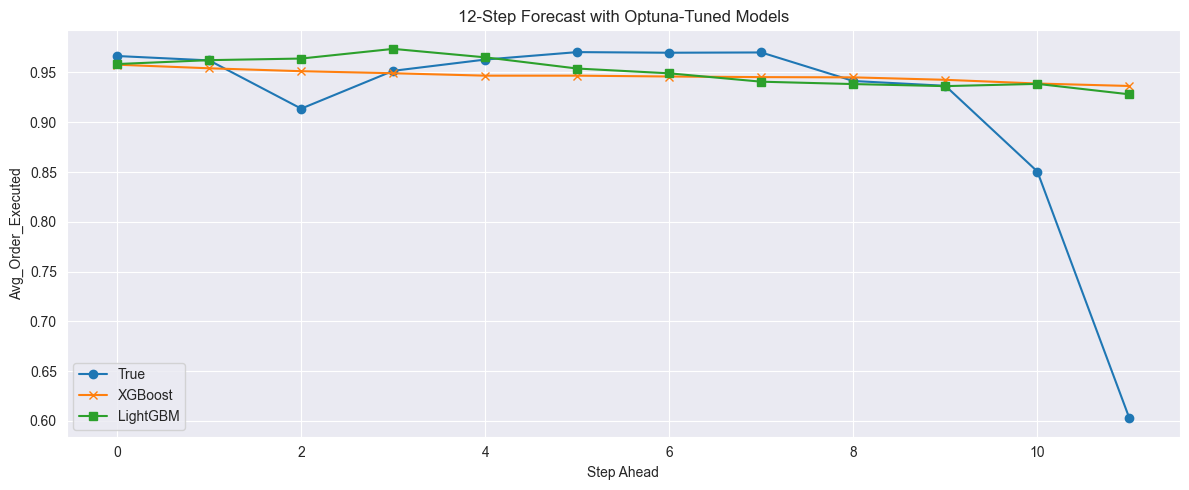


--- Forecast Evaluation ---
XGBoost    | MSE 0.010228 MAE 0.048066 R² -0.0194
LightGBM   | MSE 0.009850 MAE 0.047172 R² 0.0183


In [39]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, early_stopping
import optuna

warnings.filterwarnings("ignore")

# ── 1. Load & preprocess ───────────────────────────────────────────────────
fp24 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Prediction-new.csv"
fp22 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Prediction.csv"
data = pd.concat([pd.read_csv(fp24), pd.read_csv(fp22)], ignore_index=True)

data["timestamp"] = pd.to_datetime({
    "year": data["Year"], "month": data["Month"], "day": data["Day"],
    "hour": data["Hour"], "minute": data["Minute"], "second": data["Second"]
})
data = (data.sort_values("timestamp")
             .set_index("timestamp")
             .resample("15min").mean()
             .interpolate("linear")
             .drop(columns=["Year","Month","Day","Hour","Minute","Second"], errors="ignore"))

# ── 2. Lag features ────────────────────────────────────────────────────────
def add_lags(df, col, n=120):
    lags = pd.concat([df[col].shift(i).rename(f"{col}_lag{i}") for i in range(1,n+1)], axis=1)
    ma   = df[col].rolling(7).mean().rename(f"{col}_moving_avg_7")
    return pd.concat([df, lags, ma], axis=1)

TARGET, LAGS = "Avg_Order_Executed", 120
data = add_lags(data, TARGET, LAGS).dropna()

# ── 3. Split ───────────────────────────────────────────────────────────────
H = 12
forecast_df = data.iloc[-H:]
data = data.iloc[:-H]

X = data.drop(columns=[TARGET])
y = data[TARGET]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc   = scaler.transform(X_val)
X_test_sc  = scaler.transform(X_test)

# ── 4. Optuna tuning ───────────────────────────────────────────────────────
def tune_model(trial, model_type):
    if model_type == 'xgb':
        model = XGBRegressor(
            n_estimators=1000,
            max_depth=trial.suggest_int('max_depth', 3, 12),
            learning_rate=trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
            random_state=42,
            eval_metric='rmse',
            early_stopping_rounds=50
        )
        model.fit(X_train_sc, y_train, eval_set=[(X_val_sc, y_val)], verbose=False)

    elif model_type == 'lgb':
        model = LGBMRegressor(
            n_estimators=1000,
            max_depth=trial.suggest_int('max_depth', 3, 12),
            learning_rate=trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
            num_leaves=trial.suggest_int('num_leaves', 20, 150),
            reg_lambda=trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
            random_state=42
        )
        model.fit(X_train_sc, y_train, eval_set=[(X_val_sc, y_val)],
                  callbacks=[early_stopping(stopping_rounds=50)])

    preds = model.predict(X_val_sc)
    return mean_squared_error(y_val, preds)

# ── 5. Run Optuna studies ──────────────────────────────────────────────────
models = {}
for name in ['xgb', 'lgb']:
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: tune_model(trial, name), n_trials=30, show_progress_bar=True)
    models[name] = study.best_params

# ── 6. Train final models ──────────────────────────────────────────────────
xgb_model = XGBRegressor(**models['xgb'], n_estimators=1000, random_state=42,
                         eval_metric='rmse', early_stopping_rounds=50)
xgb_model.fit(X_train_sc, y_train, eval_set=[(X_val_sc, y_val)], verbose=False)

lgb_model = LGBMRegressor(**models['lgb'], n_estimators=1000, random_state=42)
lgb_model.fit(X_train_sc, y_train, eval_set=[(X_val_sc, y_val)],
              callbacks=[early_stopping(stopping_rounds=50)])

# ── 7. Evaluate on test set ────────────────────────────────────────────────
def show_eval(name, model):
    preds = model.predict(X_test_sc)
    print(f"{name:10} | MSE {mean_squared_error(y_test,preds):.6f} "
          f"MAE {mean_absolute_error(y_test,preds):.6f} "
          f"R² {r2_score(y_test,preds):.4f}")

print("\n--- Test Set Evaluation ---")
show_eval("XGBoost", xgb_model)
show_eval("LightGBM", lgb_model)

# ── 8. Forecast ────────────────────────────────────────────────────────────
pred_xgb, pred_lgb = [], []
last_xgb = data.iloc[-1].copy()
last_lgb = last_xgb.copy()

def step_forecast(last, model):
    for lag in range(LAGS, 1, -1):
        last[f"{TARGET}_lag{lag}"] = last[f"{TARGET}_lag{lag-1}"]
    last[f"{TARGET}_lag1"] = last[TARGET]
    last[f"{TARGET}_moving_avg_7"] = np.mean([last[f"{TARGET}_lag{i}"] for i in range(1, 8)])
    Xn = scaler.transform(pd.DataFrame([last.drop(TARGET)]))
    y_pred = model.predict(Xn)[0]
    last[TARGET] = y_pred
    return y_pred, last

for _ in range(H):
    y_xgb, last_xgb = step_forecast(last_xgb.copy(), xgb_model)
    y_lgb, last_lgb = step_forecast(last_lgb.copy(), lgb_model)
    pred_xgb.append(y_xgb)
    pred_lgb.append(y_lgb)

future_y = forecast_df[TARGET].values

# ── 9. Evaluation & Plot ───────────────────────────────────────────────────
plt.figure(figsize=(12,5))
plt.plot(future_y,  label="True",     marker='o')
plt.plot(pred_xgb,  label="XGBoost",  marker='x')
plt.plot(pred_lgb,  label="LightGBM", marker='s')
plt.title(f"{H}-Step Forecast with Optuna-Tuned Models")
plt.xlabel("Step Ahead"); plt.ylabel(TARGET)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

def show_forecast(name,y):
    print(f"{name:10} | MSE {mean_squared_error(future_y,y):.6f} "
          f"MAE {mean_absolute_error(future_y,y):.6f} "
          f"R² {r2_score(future_y,y):.4f}")

print("\n--- Forecast Evaluation ---")
show_forecast("XGBoost",  pred_xgb)
show_forecast("LightGBM", pred_lgb)


#Arima Model for Forecasting

In [1]:
!pip uninstall -y pmdarima numpy

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


You can safely remove it manually.
You can safely remove it manually.


In [4]:
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
    --------------------------------------- 0.3/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 882.6 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/15.5 MB 1.0 MB/s eta 0:00:15
   -- ------------------------------------- 1.0/15.5 MB 1.3 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/15.5 MB 2.1 MB/s eta 0:00:07
   -------- ------------------------------- 3.4/15.5 MB 2.7 MB/s eta 0:00:05
   ------------ --------------------------- 5.0/15.5 MB 3.4 MB/s eta 0:00:04
   --------------------- ------------------ 8.4/15.5 MB 5.4 MB/s eta 0:00:02
   ------------------------------------ --- 14.2/15.5 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 8.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   -------------------------------------- 625.1/625.1 kB 928.3 kB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
"""
Auto‑ARIMA for Avg_Order_Executed with 15min steps and 30min seasonality.

pip install pmdarima
"""
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# 1⃣ Load -----------------------------------------------------------------
file_path_2024 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction.csv"
file_path_2022 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction-new.csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

data_arima = pd.concat([df_2024, df_2022], ignore_index=True)

# Build timestamp from date parts
data_arima["timestamp"] = pd.to_datetime({
    "year":   data_arima["Year"],
    "month":  data_arima["Month"],
    "day":    data_arima["Day"],
    "hour":   data_arima["Hour"],
    "minute": data_arima["Minute"],
    "second": data_arima["Second"]
})
data_arima = data_arima.sort_values("timestamp").set_index("timestamp")

# 2⃣ Target series with 15min uniform steps ------------------------------
y = data_arima["Avg_Order_Executed"]

# Reindex to uniform 15min steps and fill missing values
expected_freq = pd.Timedelta(minutes=15)
full_index = pd.date_range(start=y.index[0], end=y.index[-1], freq=expected_freq)
y = y.reindex(full_index).fillna(method='ffill')

# 3⃣ Train / test split ---------------------------------------------------
split = int(len(y) * 0.8)
y_train, y_test = y[:split], y[split:]

# 4⃣ Auto‑ARIMA search ----------------------------------------------------
seasonal_period = 4  # 1 hour seasonality (4 * 15min)
model = auto_arima(
    y_train,
    seasonal=True,
    m=seasonal_period,
    stepwise=False,
    error_action="ignore",
    suppress_warnings=True,
    n_jobs=-1,                   # parallel
    information_criterion="aicc",
    trace=True
)

# 5⃣ Back‑test ------------------------------------------------------------
pred = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
print("MSE:", mean_squared_error(y_test, pred), "|  MAE:", mean_absolute_error(y_test, pred))
print(model.summary())
model.update(y_test)

# 6⃣ Future forecast ------------------------------------------------------
future_horizon = 12
step = y.index[-1] - y.index[-2]  # will be 15 min

# continue from last timestamp exactly
last_timestamp = y.index[-1]
future_index = [last_timestamp + step * (i + 1) for i in range(future_horizon)]

future_values = model.predict(n_periods=future_horizon)
future = pd.Series(future_values, index=future_index)

print(future.head())



Best model:  ARIMA(3,1,2)(0,0,0)[4] intercept
Total fit time: 530.471 seconds
MSE: 0.00782584831643611 |  MAE: 0.06145150270067116
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                52941
Model:               SARIMAX(3, 1, 2)   Log Likelihood              103402.142
Date:                Tue, 20 May 2025   AIC                        -206790.284
Time:                        23:51:52   BIC                        -206728.146
Sample:                    09-05-2022   HQIC                       -206770.871
                         - 03-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.109e-06    7.5e-05      0.028      0.978      -0.000       0.000

{'MSE': 0.00782584831643611, 'MAE': 0.06145150270067116, 'R²': -0.4245360894218504}


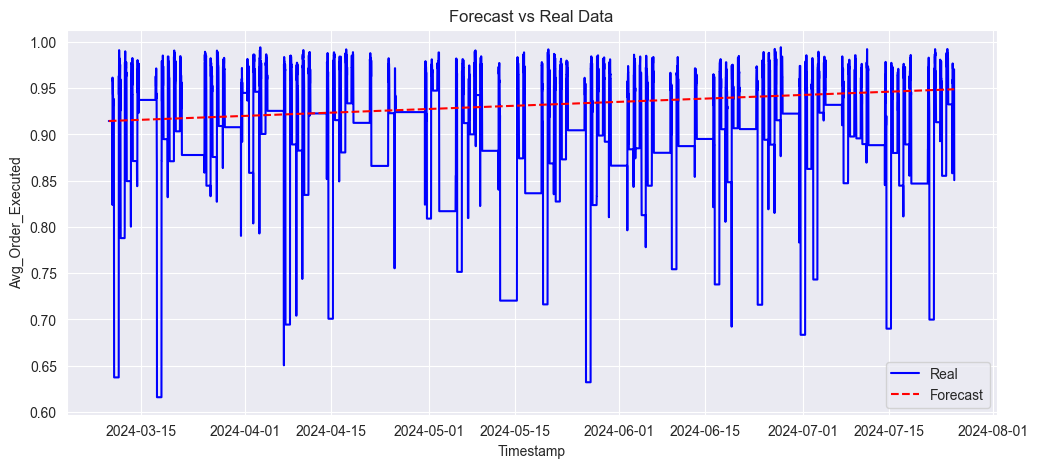

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 📊 Metrics Calculation
metrics = {
    'MSE': mean_squared_error(y_test, pred),
    'MAE': mean_absolute_error(y_test, pred),
    'R²': r2_score(y_test, pred)
}
print(metrics)

# 📈 Forecast vs Real Plot (ONLY forecasted part)
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Real', color='blue')
plt.plot(pred.index, pred, label='Forecast', color='red', linestyle='--')
plt.title('Forecast vs Real Data')
plt.xlabel('Timestamp')
plt.ylabel('Avg_Order_Executed')
plt.legend()
plt.grid(True)
plt.show()

#Transformer Model

In [1]:
!pip install "chronos-forecasting[training] @ git+https://github.com/amazon-science/chronos-forecasting.git"
!pip install chronos-forecasting

  Cloning https://github.com/amazon-science/chronos-forecasting.git to c:\users\shalevle\appdata\local\temp\pip-install-l3qonuad\chronos-forecasting_2d01114ffde04739860680826fbe7dc1
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 6a9c8dadac04eb85befc935043e3e2cce914267f
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached typer-0.15.4-py3-none-any.whl (45 kB)
  Using cached gluonts-0.16.1-py3-none-any.whl (1.5 MB)
  Using cached datasets-2.21.0-py3-none-any.whl (527 kB)
  Using cached typer_config-1.4.2-py3-none-any.whl (11 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Using cached aiohttp-3.11.18-cp310-cp310-win_amd64.whl (442 kB)
  Using cached fs

  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git 'C:\Users\shalevle\AppData\Local\Temp\pip-install-l3qonuad\chronos-forecasting_2d01114ffde04739860680826fbe7dc1'

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


MSE: 0.000585, MAE: 0.018883, R²: 0.9417


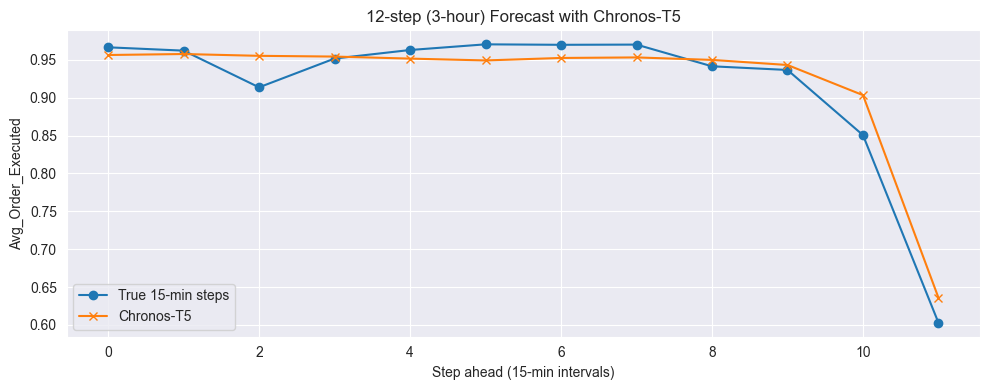

In [11]:
import pandas as pd
import numpy as np
import torch
from chronos import ChronosPipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load & concatenate CSVs
file1 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Prediction.csv"
file2 = r"C:\Users\shalevle\Desktop\fintech\processed_timestamp_data_Prediction-new.csv"
df = pd.concat([pd.read_csv(file1), pd.read_csv(file2)], ignore_index=True)

# 2. Build 15-min datetime index & fill gaps
df["timestamp"] = pd.to_datetime({
    "year": df["Year"], "month": df["Month"], "day": df["Day"],
    "hour": df["Hour"], "minute": df["Minute"], "second": df["Second"]
})
df = df.set_index("timestamp").sort_index()
df = df.resample("15min").mean().interpolate()

# 3. Split out last 12 points (3h) as hold-out
series = df["Avg_Order_Executed"].to_numpy(dtype="float64")
horizon = 12
train_vals = series[:-horizon]
test_vals = series[-horizon:]

# 4. Load Chronos-T5 transformer
pipe_t5 = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-large",
    device_map="cpu"
)

# 5. Build context tensor
ctx = torch.from_numpy(train_vals).unsqueeze(0)  # shape (1, T)

# 6. Rolling (walk-forward) forecast, one step at a time
preds = []
context_vals = train_vals.copy()
for _ in range(horizon):
    ctx = torch.from_numpy(context_vals[-8192:]).unsqueeze(0)  # shape (1, T)
    raw = pipe_t5.predict(context=ctx, prediction_length=1, limit_prediction_length=True)
    arr = raw.cpu().numpy()
    if arr.ndim == 2:
        arr = arr[:, None, :]           # ensure shape (1, S, 1)
    mean_pred = arr.mean(axis=1).squeeze()  # scalar
    preds.append(mean_pred)
    context_vals = np.append(context_vals, mean_pred)

preds = np.array(preds)

# 7. Compute metrics on the rolling forecasts
mse = mean_squared_error(test_vals, preds)
mae = mean_absolute_error(test_vals, preds)
r2  = r2_score(test_vals, preds)
print(f"MSE: {mse:.6f}, MAE: {mae:.6f}, R²: {r2:.4f}")

# 10. Plot the last part of the training series plus the forecasts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# x-axis for the horizon (0 … 11)
h_idx = np.arange(horizon)

# plot the ground-truth hold-out points
plt.plot(h_idx, test_vals, marker='o', label="True 15-min steps")

# plot mean and median forecasts
plt.plot(h_idx, preds,  marker='x', label="Chronos-T5")


plt.title("12-step (3-hour) Forecast with Chronos-T5")
plt.xlabel("Step ahead (15-min intervals)")
plt.ylabel("Avg_Order_Executed")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


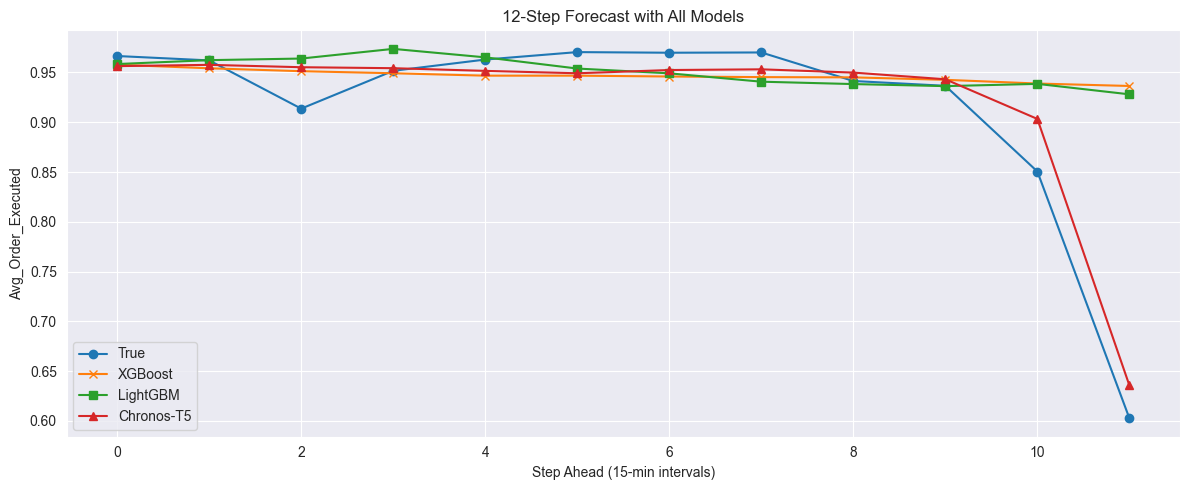

In [40]:
plt.figure(figsize=(12, 5))
h_idx = np.arange(horizon)

plt.plot(h_idx, future_y,   label="True",      marker='o')
plt.plot(h_idx, pred_xgb,   label="XGBoost",   marker='x')
plt.plot(h_idx, pred_lgb,   label="LightGBM",  marker='s')
plt.plot(h_idx, preds,      label="Chronos-T5",marker='^')

plt.title(f"{horizon}-Step Forecast with All Models")
plt.xlabel("Step Ahead (15-min intervals)")
plt.ylabel("Avg_Order_Executed")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def show_forecast(name, y_true, y_pred):
    print(f"{name:10} | MSE: {mean_squared_error(y_true, y_pred):.6f} "
          f"MAE: {mean_absolute_error(y_true, y_pred):.6f} "
          f"R²: {r2_score(y_true, y_pred):.4f}")

print("\n--- Forecast Evaluation ---")
show_forecast("XGBoost",   future_y, pred_xgb)
show_forecast("LightGBM",  future_y, pred_lgb)
show_forecast("Chronos-T5", test_vals, preds)  # make sure future_y == test_vals



--- Forecast Evaluation ---
XGBoost    | MSE: 0.010228 MAE: 0.048066 R²: -0.0194
LightGBM   | MSE: 0.009850 MAE: 0.047172 R²: 0.0183
Chronos-T5 | MSE: 0.000585 MAE: 0.018883 R²: 0.9417
